In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from patsy import dmatrices
import seaborn as sns

In [2]:
dta=sm.datasets.fair.load_pandas().data

In [3]:
dta['affair']=(dta.affairs>0).astype(int)

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
dta.groupby('affair').mean()
#women who have affair rate marriage low

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [6]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [7]:
type(dta)

pandas.core.frame.DataFrame

In [8]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
affair             6366 non-null int32
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [9]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [10]:
dta.isnull().any()

rate_marriage      False
age                False
yrs_married        False
children           False
religious          False
educ               False
occupation         False
occupation_husb    False
affairs            False
affair             False
dtype: bool

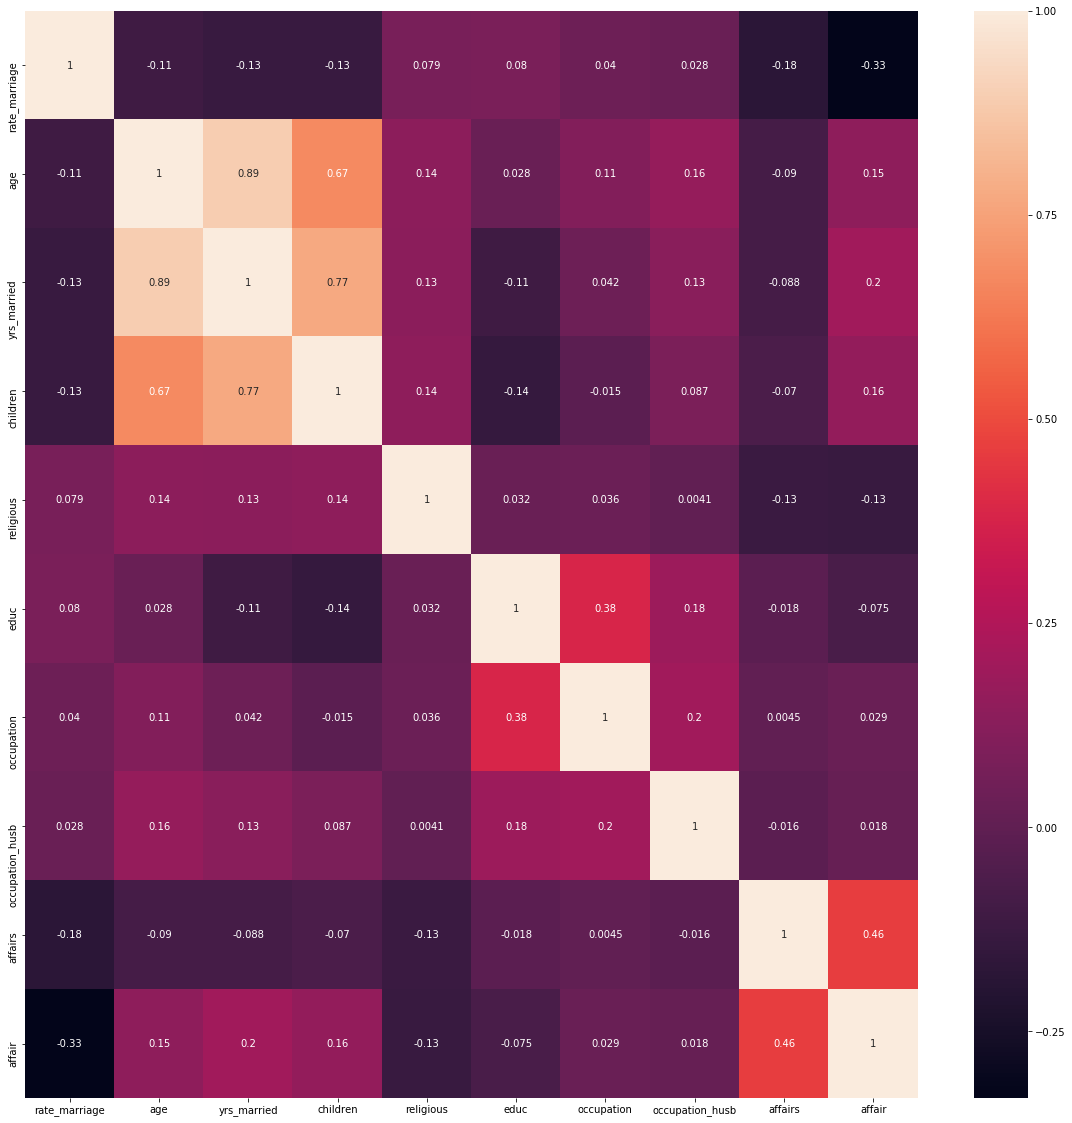

In [11]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dta.corr(),annot=True)

In [12]:
occ_dum=pd.get_dummies(dta['occupation'],prefix="occ_",drop_first=True)
dta=pd.concat([dta,occ_dum],axis=1)

In [13]:
occ_husb_dum=pd.get_dummies(dta['occupation_husb'],prefix="occ_husb_",drop_first=True)
dta=pd.concat([dta,occ_husb_dum],axis=1)

In [14]:
dta.drop(columns=['affairs','occupation','occupation_husb'],inplace=True)

In [15]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,affair,occ__2.0,occ__3.0,occ__4.0,occ__5.0,occ__6.0,occ_husb__2.0,occ_husb__3.0,occ_husb__4.0,occ_husb__5.0,occ_husb__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0,0,0,1,0,0


In [16]:
X=dta.loc[:,dta.columns!='affair']
y=dta['affair']
y = np.ravel(y) 

In [17]:
model = LogisticRegression()

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.30, random_state=1234)

In [18]:
model.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
print("Train scrore: {}".format(model.score(train_x,train_y)))
print("Test scrore: {}".format(model.score(test_x,test_y)))

Train scrore: 0.7250897666068222
Test scrore: 0.7308900523560209


In [24]:
predicted=model.predict(test_x)

In [23]:
probs = model.predict_proba(test_x)
print(probs)

[[0.86835947 0.13164053]
 [0.76509934 0.23490066]
 [0.65795814 0.34204186]
 ...
 [0.84607624 0.15392376]
 [0.33323649 0.66676351]
 [0.66937907 0.33062093]]


In [26]:
print(metrics.accuracy_score(test_y, predicted))
print(metrics.roc_auc_score(test_y, probs[:, 1]))

0.7308900523560209
0.756194450250316


In [28]:
print(metrics.confusion_matrix(test_y, predicted))
print(metrics.classification_report(test_y, predicted))

[[1169  115]
 [ 399  227]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1284
           1       0.66      0.36      0.47       626

   micro avg       0.73      0.73      0.73      1910
   macro avg       0.70      0.64      0.64      1910
weighted avg       0.72      0.73      0.70      1910



In [30]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.72413793 0.70062696 0.73510972 0.71069182 0.71069182 0.73113208
 0.72798742 0.7091195  0.75157233 0.75157233]
0.7252641903747954


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
